In [17]:
import pandas as pd
from pandas import DataFrame
import numpy as np

In [20]:
df = pd.read_csv('Pokemon.csv', encoding='latin1') 

In [21]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,FALSE
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,FALSE
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,FALSE
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,TRUE
806,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
807,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [56]:
# 观察到最后4行无有效数据，直接删除（保留前805行）
df_clean = df.iloc[:-4].copy()  # 切片删除最后4行，copy避免警告
print("\n删除无意义行后数据集形状：", df_clean.shape)  # 应输出(806, 13)


删除无意义行后数据集形状： (806, 13)


<Axes: xlabel='Type 2'>

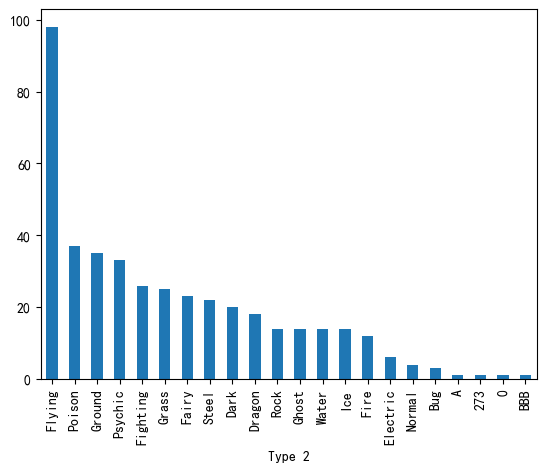

In [57]:
# 查看Type2列的所有取值及计数
df_clean['Type 2'].value_counts().plot(kind='bar')

<Axes: xlabel='Type 2'>

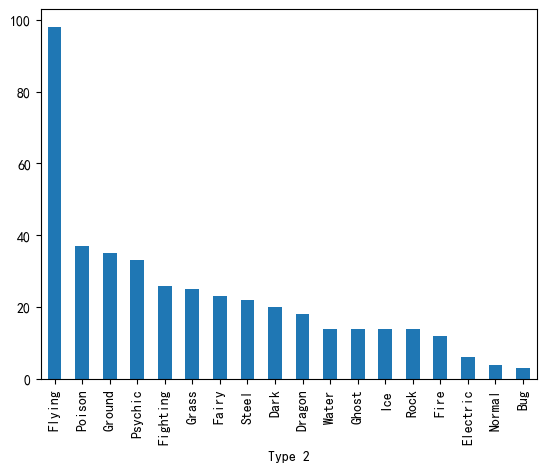

In [58]:
# 发现A，273，0，BBB异常值，删除异常行
df_clean = df_clean[~df_clean['Type 2'].isin({'A', '273', '0', 'BBB'})]

# 重新查看Type2列的所有取值及计数
df_clean['Type 2'].value_counts().plot(kind='bar')

In [59]:
# 检查完全重复的行
df_clean[df_clean.duplicated()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
15,11,Metapod,Bug,NaN,205,50,20,55,25,25,30,1,FALSE
23,17,Pidgeotto,Normal,Flying,349,63,60,55,50,50,71,1,FALSE
185,168,Ariados,Bug,Poison,390,70,90,70,60,60,40,2,FALSE
186,168,Ariados,Bug,Poison,390,70,90,70,60,60,40,2,FALSE
187,168,Ariados,Bug,Poison,390,70,90,70,60,60,40,2,FALSE


In [60]:
# 删除重复行
df_clean = df_clean.drop_duplicates()
print("\n删除重复值后数据集形状：", df_clean.shape)

# 验证无重复值
print(f"处理后重复行数量：{len(df_clean[df_clean.duplicated()])}")  # 应输出0


删除重复值后数据集形状： (797, 13)
处理后重复行数量：0


In [61]:
# 查看Attack列的描述性统计
print("Attack属性描述性统计：")
print(df_clean['Attack'].describe())

Attack属性描述性统计：
count     796
unique    117
top       100
freq       39
Name: Attack, dtype: object


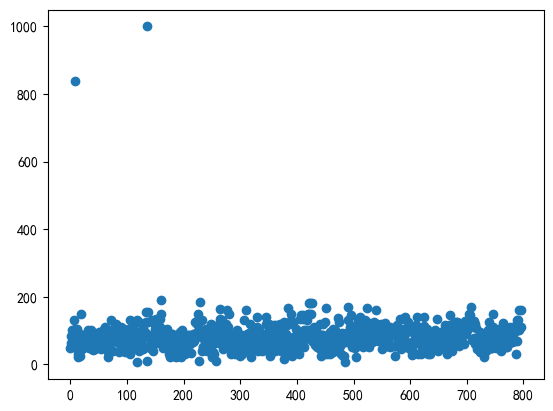

In [62]:
# 1. 将 Attack 列转为数值类型（非数值值→NaN）
df_clean['Attack'] = pd.to_numeric(df_clean['Attack'], errors='coerce')
#查看分布
plt.scatter(range(0,df_clean.shape[0]),df_clean.iloc[:,6])

In [65]:
# 2. 通过3σ原则识别异常值
#计算 3σ 异常值
attack_mean = df_clean['Attack'].mean()
attack_std = df_clean['Attack'].std()
upper_bound = attack_mean + 3 * attack_std
lower_bound = attack_mean - 3 * attack_std

#过滤异常值（保留在 [lower_bound, upper_bound] 范围内的数据）
df_clean = df_clean[(df_clean['Attack'] >= lower_bound) & (df_clean['Attack'] <= upper_bound)]

print(f"Attack 列均值：{attack_mean:.2f}")
print(f"Attack 列标准差：{attack_std:.2f}")
print(f"异常值边界：[{lower_bound:.2f}, {upper_bound:.2f}]")
print(f"清理后的数据量：{len(df_clean)} 行")

Attack 列均值：78.92
Attack 列标准差：32.43
异常值边界：[-18.37, 176.22]
清理后的数据量：789 行


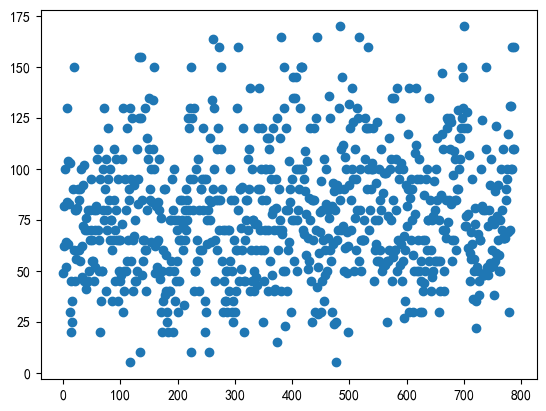

In [66]:
#查看清理异常值后的分布
plt.scatter(range(0,df_clean.shape[0]),df_clean.iloc[:,6])

In [67]:
# 查看Generation和Legendary列的取值类型和分布
print("Generation列取值类型：", df_clean['Generation'].dtype)
print("Legendary列取值类型：", df_clean['Legendary'].dtype)
print("\nGeneration列取值分布：")
print(df_clean['Generation'].value_counts())
print("\nLegendary列取值分布：")
print(df_clean['Legendary'].value_counts())

Generation列取值类型： object
Legendary列取值类型： object

Generation列取值分布：
Generation
5            165
1            158
3            156
4            121
2            105
6             81
FALSE          2
undefined      1
Name: count, dtype: int64

Legendary列取值分布：
Legendary
FALSE     722
TRUE       60
0           3
1           1
Poison      1
Ground      1
Name: count, dtype: int64


In [70]:
# 定义有效取值集合
valid_generation = {'1', '2', '3', '4', '5', '6'}  # Generation列有效数字（字符串形式）
valid_legendary = {'TRUE', 'FALSE', True, False}   # Legendary列有效布尔值（含字符串和布尔类型）

# 1. 筛选 Generation 列非数字的完整行
generation_invalid_full = df_clean[~df_clean['Generation'].isin(valid_generation)]

# 2. 筛选 Legendary 列非 True/False 的完整行
legendary_invalid_full = df_clean[~df_clean['Legendary'].isin(valid_legendary)]

# 3. 合并所有异常行（去重，避免同一行被重复显示）
all_invalid_full = pd.concat([generation_invalid_full, legendary_invalid_full]).drop_duplicates()

In [71]:
display(all_invalid_full)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
11,9,Blastoise,Water,NaN,530,79,83.0,100,85,105,78,FALSE,1
32,25,Pikachu,Electric,NaN,320,35,55.0,40,50,50,90,FALSE,0
771,695,Heliolisk,Electric,Normal,481,62,55.0,52,109,94,109,undefined,FALSE
45,38,Ninetales,Fire,NaN,505,73,76.0,75,81,100,100,1,0
78,70,Weepinbell,Grass,Poison,390,65,90.0,50,85,45,55,1,Poison
115,105,Marowak,Ground,NaN,425,60,80.0,110,50,80,45,1,Ground
130,119,Seaking,Water,NaN,450,80,92.0,65,65,80,68,1,0
533,475,GalladeMega Gallade,Psychic,Fighting,618,68,165.0,95,65,115,110,4,NaN


In [73]:
#发现有两行的Generation与Legendary属性被置换，两行Legendary的属性被误填了其他属性的值
#1.互换行号为11和32的行的 Generation 和 Legendary 属性
# 保存原始值
gen_11 = df_clean.loc[11, 'Generation']
leg_11 = df_clean.loc[11, 'Legendary']
gen_32 = df_clean.loc[32, 'Generation']
leg_32 = df_clean.loc[32, 'Legendary']

# 互换值
df_clean.loc[11, 'Generation'] = leg_32
df_clean.loc[11, 'Legendary'] = gen_32
df_clean.loc[32, 'Generation'] = leg_11
df_clean.loc[32, 'Legendary'] = gen_11

# 2. 将索引为78、115的行的 Legendary 属性设为 undefined
df_clean.loc[78, 'Legendary'] = 'undefined'
df_clean.loc[115, 'Legendary'] = 'undefined'

# 验证结果
print("修改后索引=11、32、78、115 的行：")
display(df_clean.loc[[11,32,78,115], ['Generation', 'Legendary']])

修改后索引=11、32、78、115 的行：


,Generation,Legendary
11,0,FALSE
32,1,FALSE
78,1,undefined
115,1,undefined
